In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [36]:
data = 'data/Ames_Housing_Data.tsv'
df = pd.read_csv(data, sep='\t')

In [37]:
df.sample(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
51,52,528218150,20,RL,100.0,18494,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,199500
877,878,907290180,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,144000
2653,2654,902206020,30,RM,52.0,7830,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,61500
1366,1367,903475020,20,RM,49.0,8235,Pave,NaN,IR1,HLS,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,125000
2560,2561,534476100,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,135000


## Observation & Inspection of the dataset

In [38]:
num_obs, num_feat = df.shape
print('Rows:', num_obs, '\nCols:', num_feat)

Rows: 2930 
Cols: 82


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [40]:
tar_feat = 'SalePrice'

def reset_var(val):
    inp_feat = val.iloc[:, :-1]
    numerical_cols = inp_feat.select_dtypes('number').columns
    cat_cols = inp_feat.select_dtypes('object').columns
    
    return inp_feat, numerical_cols, cat_cols

x, num_cols, obj_cols = reset_var(df)

print('Numerical Features:',num_cols.shape[0], '\nCategorical Features',obj_cols.shape[0])

Numerical Features: 38 
Categorical Features 43


## Treating Missing Values for num columns

In [41]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [42]:
df[num_cols].isna().sum().sort_values(ascending=False)

Lot Frontage       490
Garage Yr Blt      159
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Kitchen AbvGr        0
Enclosed Porch       0
3Ssn Porch           0
Open Porch SF        0
Wood Deck SF         0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Fireplaces           0
TotRms AbvGrd        0
Order                0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
PID                  0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Overall Qual         0
Lot Area             0
MS SubClass          0
Yr Sold              0
dtype: int64

In [43]:
# drop factor for any col with missing value of more than 3/4 of the observations
drop_factor = df.shape[0] * (3/4)
drop_num_cols = [x for x in num_cols if df[x].isna().sum() > drop_factor]
num_cols_miss = [x for x in num_cols if df[x].isna().sum() > 0 and x not in drop_num_cols]
print(f'Numerical Columns with missing values ({len(num_cols_miss)})\n',num_cols_miss)
print(f'Dropping ({len(drop_num_cols)})\n', drop_num_cols)

Numerical Columns with missing values (11)
 ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']
Dropping (0)
 []


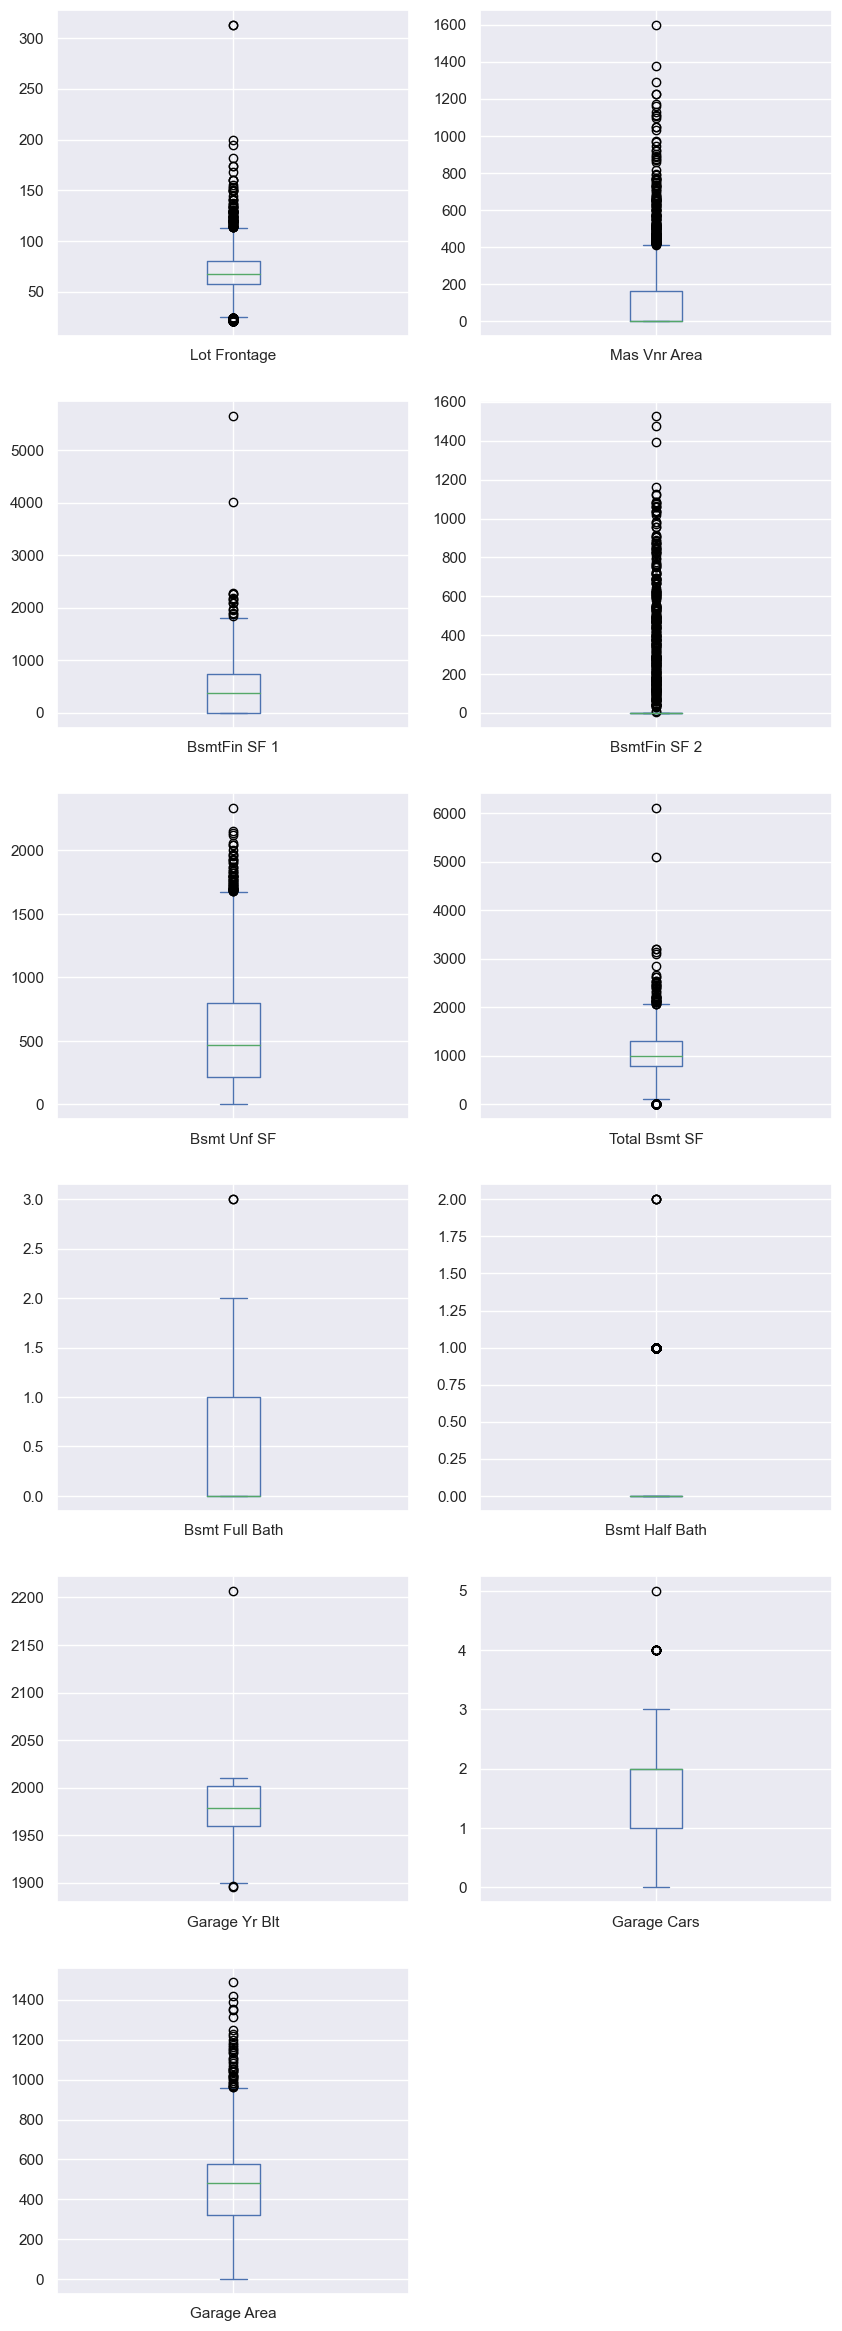

In [44]:
# checking if they are outliers to median and non or minimal outliers mean is used
df[num_cols_miss].plot(kind='box', subplots=True, layout=(10,2), figsize=(10, 50),sharex=False, sharey=False)
plt.show();

In [45]:
# filling missing numerical values
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')
df[num_cols_miss] = si.fit_transform(df[num_cols_miss])


## Treating Missing Values for Categorical Columns

In [46]:
# Treating Categorical columns
df[obj_cols].describe().T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


In [47]:
df[obj_cols].isna().sum().sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Electrical           1
Kitchen Qual         0
Central Air          0
Functional           0
Heating QC           0
Heating              0
Paved Drive          0
Sale Type            0
MS Zoning            0
Street               0
Condition 2          0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Bldg Type            0
Foundation           0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Sale Condition       0
dtype: int6

In [48]:
#drop 3/4 of the observations
drop_obj_cols = [x for x in obj_cols if df[x].isna().sum() > drop_factor]
obj_cols_miss = [x for x in obj_cols if df[x].isna().sum() > 0 and x not in drop_obj_cols]
print(f'Object Columns with missing values ({len(obj_cols_miss)})\n',obj_cols_miss)
print(f'Dropping ({len(drop_obj_cols)})\n', drop_obj_cols)

Object Columns with missing values (12)
 ['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
Dropping (4)
 ['Alley', 'Pool QC', 'Fence', 'Misc Feature']


In [49]:
# Dropping columns with more 3/4 missing values
df.drop(drop_obj_cols, axis=1, inplace=True)

In [50]:
# filling missing values of categorical with the most frequent
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
df[obj_cols_miss] = si.fit_transform(df[obj_cols_miss])

In [51]:
x, num_cols, obj_cols = reset_var(df)
print('Numerical Features:',num_cols.shape[0], '\nCategorical Features',obj_cols.shape[0])

Numerical Features: 38 
Categorical Features 39


In [52]:
dup_cols = df[df.duplicated()]
print(dup_cols.count().sum()) # no duplicate found

0


In [53]:
# dropping Numerical columns with nunique values equal to number of observations
df[num_cols].nunique().sort_values(ascending=False)

Order              2930
PID                2930
Lot Area           1960
Gr Liv Area        1292
Bsmt Unf SF        1137
1st Flr SF         1083
Total Bsmt SF      1058
BsmtFin SF 1        995
2nd Flr SF          635
Garage Area         603
Mas Vnr Area        445
Wood Deck SF        380
BsmtFin SF 2        274
Open Porch SF       252
Enclosed Porch      183
Lot Frontage        128
Screen Porch        121
Year Built          118
Garage Yr Blt       103
Year Remod/Add       61
Misc Val             38
Low Qual Fin SF      36
3Ssn Porch           31
MS SubClass          16
Pool Area            14
TotRms AbvGrd        14
Mo Sold              12
Overall Qual         10
Overall Cond          9
Bedroom AbvGr         8
Garage Cars           6
Yr Sold               5
Fireplaces            5
Full Bath             5
Kitchen AbvGr         4
Bsmt Full Bath        4
Half Bath             3
Bsmt Half Bath        3
dtype: int64

In [54]:
column_pick = []
for i in num_cols:
    cols, num_uniq, unique = i, df[i].nunique(), df[i].unique()
    if num_uniq == x.shape[0]:
        column_pick.append(cols)
        
print('dropped\n',column_pick)
df.drop(column_pick, axis=1, inplace=True)
    

dropped
 ['Order', 'PID']


In [55]:
for i in obj_cols:
    cols, num_uniq, unique = i, df[i].nunique(), df[i].unique()
    print(cols, num_uniq, unique)

MS Zoning 7 ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Street 2 ['Pave' 'Grvl']
Lot Shape 4 ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour 4 ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities 3 ['AllPub' 'NoSewr' 'NoSeWa']
Lot Config 5 ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
Land Slope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 28 ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Condition 1 9 ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']
Condition 2 8 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']
Bldg Type 5 ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
House Style 8 ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
Roof Style 6 ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
Roof Matl 8 ['CompShg' 'WdShake' 'Tar&Grv' 'WdShng

## Steps followed to clean the data 

* Inspection on the data to find missing values
* dropping ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature'] columns from obj_cols because of number of missing values is more than 3/4 of the observations
* filling missing values with median and most_frequent
* dropping ['Order', 'PID'] columns because nunique is thesame with number observations
* zero duplicated observations is found
* outliers aren't treated rather are allowed to be mitigated at the preprocessing stage
* 

In [56]:
x, num_cols, obj_cols = reset_var(df)
df[num_cols].corr()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
MS SubClass,1.000000,-0.391497,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.003634,-0.060019,-0.070847,...,-0.103234,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905
Lot Frontage,-0.391497,1.000000,0.362758,0.198917,-0.067140,0.114341,0.086139,0.201685,0.198161,0.039157,...,0.336829,0.102790,0.150107,0.012165,0.025157,0.070101,0.160860,0.035368,0.010477,-0.007123
Lot Area,-0.204613,0.362758,1.000000,0.097188,-0.034759,0.023258,0.021682,0.125950,0.191574,0.083198,...,0.212819,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085
Overall Qual,0.039419,0.198917,0.097188,1.000000,-0.094812,0.597027,0.569609,0.423089,0.284091,-0.041122,...,0.563436,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719
Overall Cond,-0.067349,-0.067140,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.132472,-0.050991,0.040992,...,-0.153745,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207
Year Built,0.036579,0.114341,0.023258,0.597027,-0.368773,1.000000,0.612095,0.306797,0.279881,-0.027328,...,0.479903,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197
Year Remod/Add,0.043397,0.086139,0.021682,0.569609,0.047680,0.612095,1.000000,0.191740,0.151809,-0.061934,...,0.376414,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652
Mas Vnr Area,0.003634,0.201685,0.125950,0.423089,-0.132472,0.306797,0.191740,1.000000,0.299841,-0.014955,...,0.370353,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,-0.002358,-0.016876
BsmtFin SF 1,-0.060019,0.198161,0.191574,0.284091,-0.050991,0.279881,0.151809,0.299841,1.000000,-0.054112,...,0.309881,0.224028,0.124974,-0.100433,0.050546,0.095888,0.084143,0.092890,-0.001110,0.022389
BsmtFin SF 2,-0.070847,0.039157,0.083198,-0.041122,0.040992,-0.027328,-0.061934,-0.014955,-0.054112,1.000000,...,0.003404,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089


In [57]:
corr_num = num_cols.to_list()+[tar_feat]
correlation_matrix = df[corr_num].corr()
saleprice_correlation = correlation_matrix[tar_feat].sort_values(ascending=False)
print(saleprice_correlation)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647812
Garage Area        0.640381
Total Bsmt SF      0.632164
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.508882
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432862
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182895
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

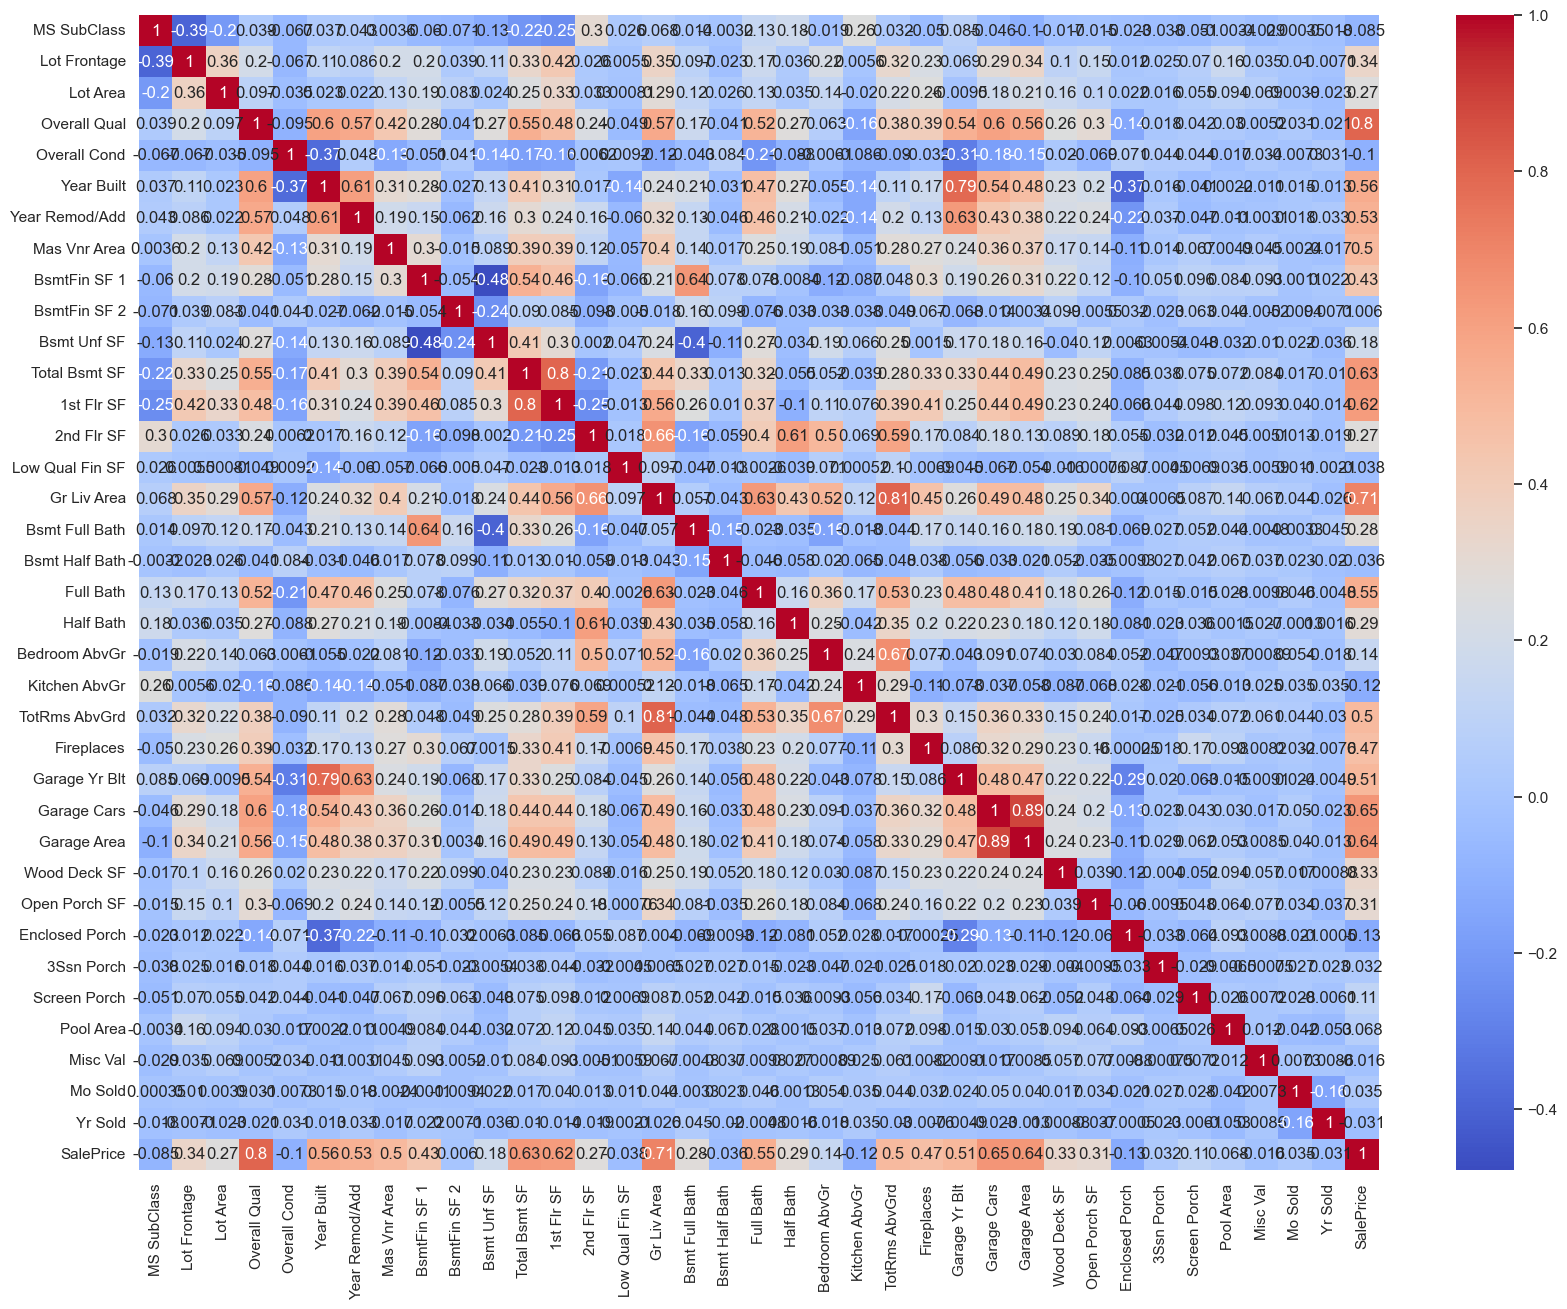

In [58]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.gcf().set_size_inches(20,15)
plt.show()

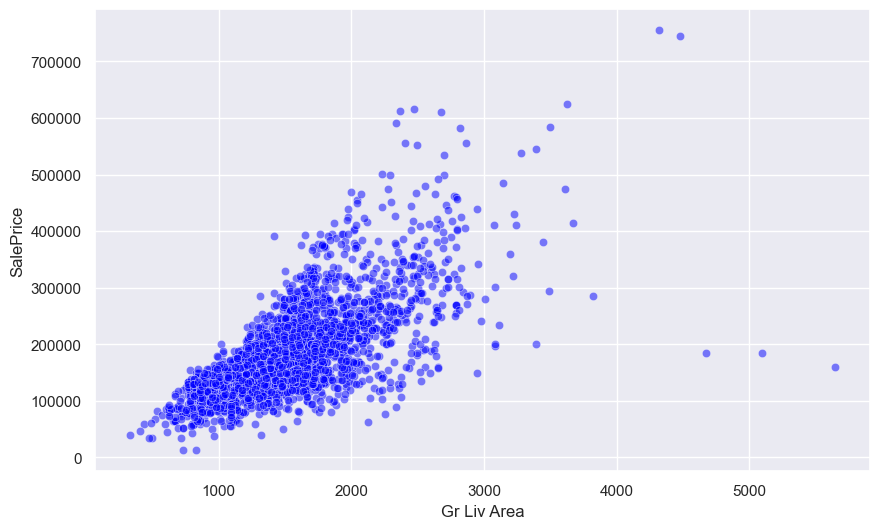

In [59]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x='Gr Liv Area', y='SalePrice', color='blue', alpha=0.5, data=df)
plt.show()

from the plot it shows that as saleprice increase, the size of Gr Liv Area increases which shows a positive correlaton with a very strong relationship.

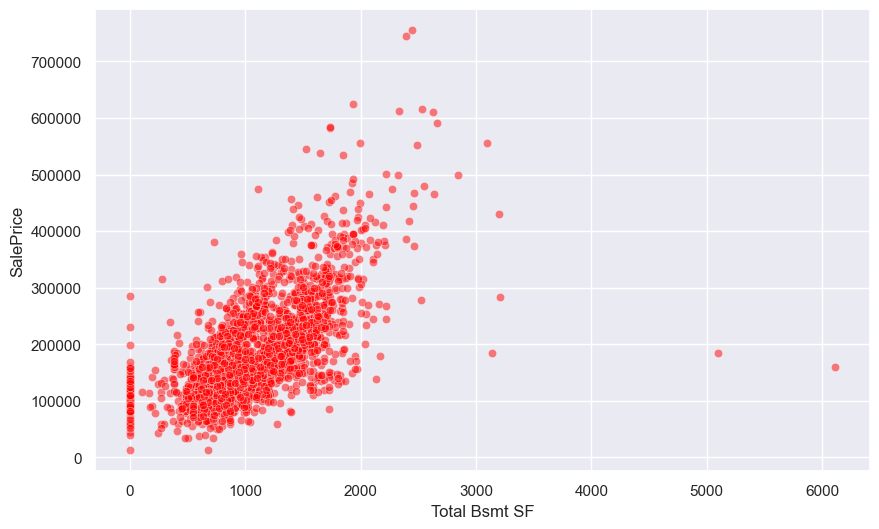

In [60]:
plt.figure(figsize=(10, 6), edgecolor='blue')
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', alpha=0.5, color='red', data=df)
plt.show()

from the plot there is a very strong positive relationship between Total Bsmt Sf and SalePrice with ome outliers that needed further investigations.
the relationship is linear and Positive variation is not spread..

C:\Users\ABDURRAHMAN IDRIS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


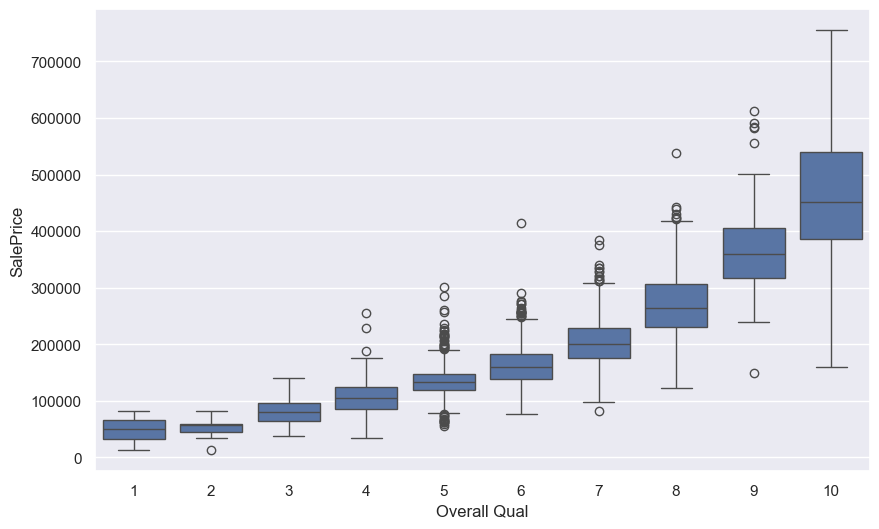

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.show()


As the SalePrice increase the Overall Qual of the houses increases the houses with highest quality have the highest SalePrice
it shows a linear relationship between the features.

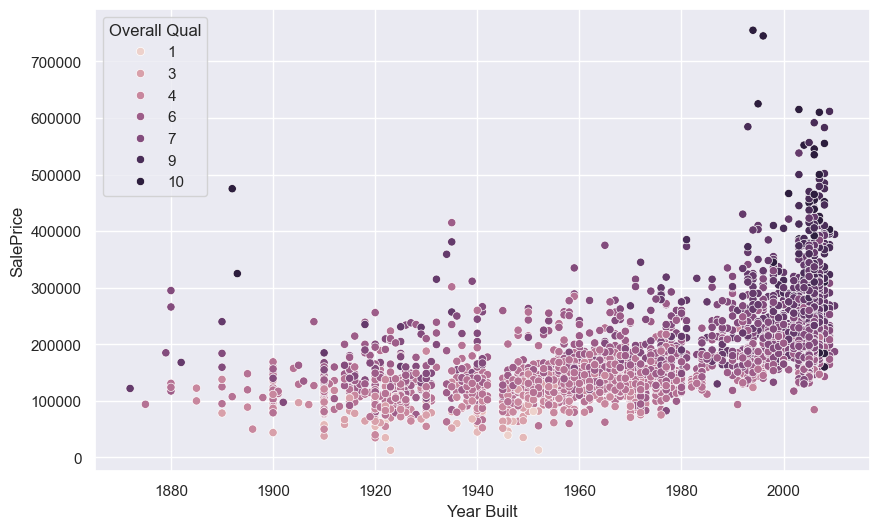

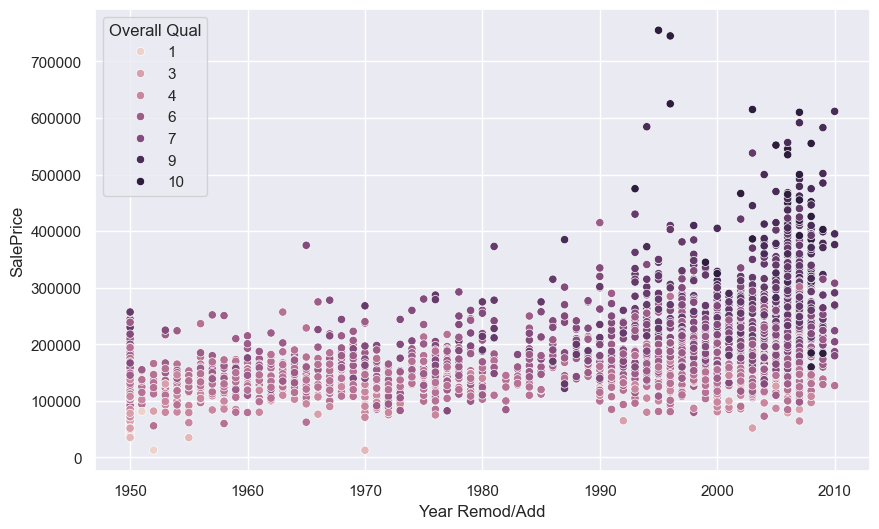

In [62]:
sns.scatterplot(x='Year Built', y='SalePrice', data=df, hue='Overall Qual')
plt.show()

sns.scatterplot(x='Year Remod/Add', y='SalePrice', data=df, hue='Overall Qual')
plt.show()

The houses built later and remodelled tends to have moderate positive correlation with the SalePrice mean they might tend to have more saleprices in market and have more Quality.

C:\Users\ABDURRAHMAN IDRIS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


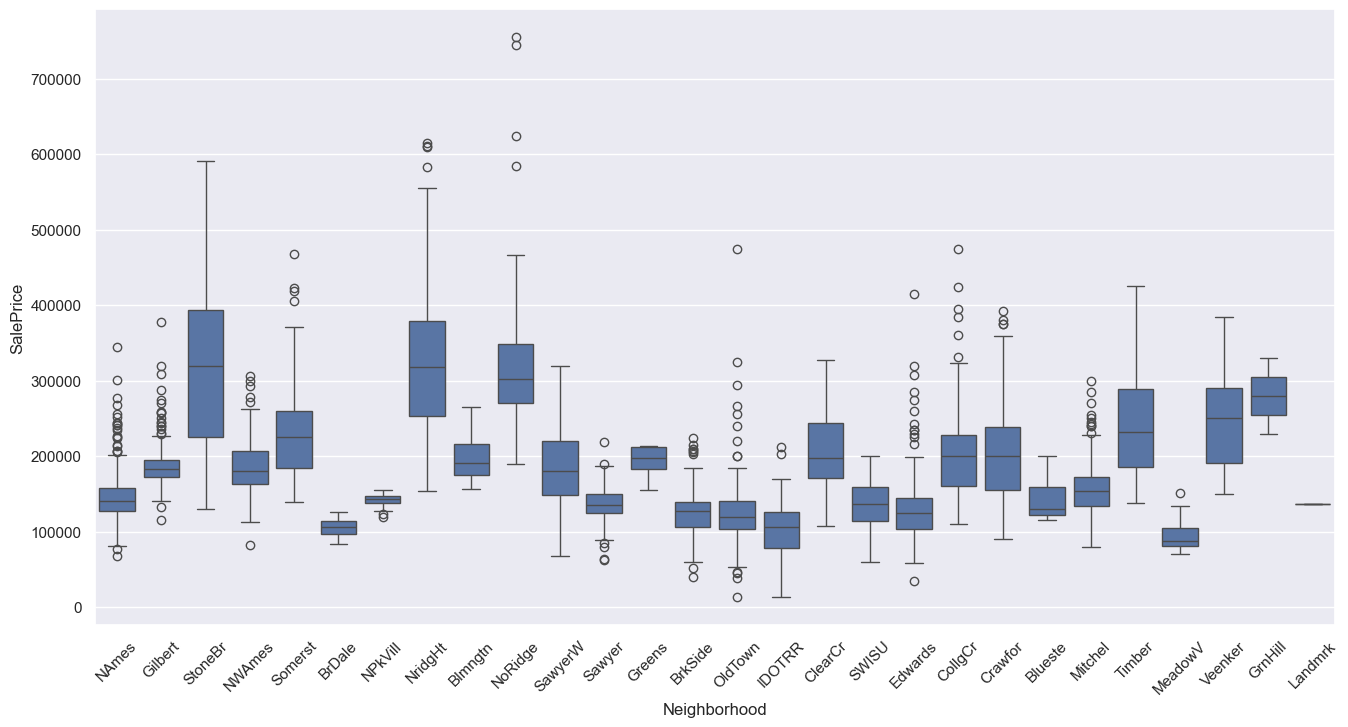

In [63]:
sns.set(rc={'figure.figsize':(16,8)})
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.show()


StoneBr and NindRigde Neighborhood is mostly prepared then followed by Noridge while Lanmark and NPKVill, BrDate are less preffered with minimal number of housing and lower housing Price.
The Neighborhood preferred by People tend cost more and have higher saleprice.

C:\Users\ABDURRAHMAN IDRIS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


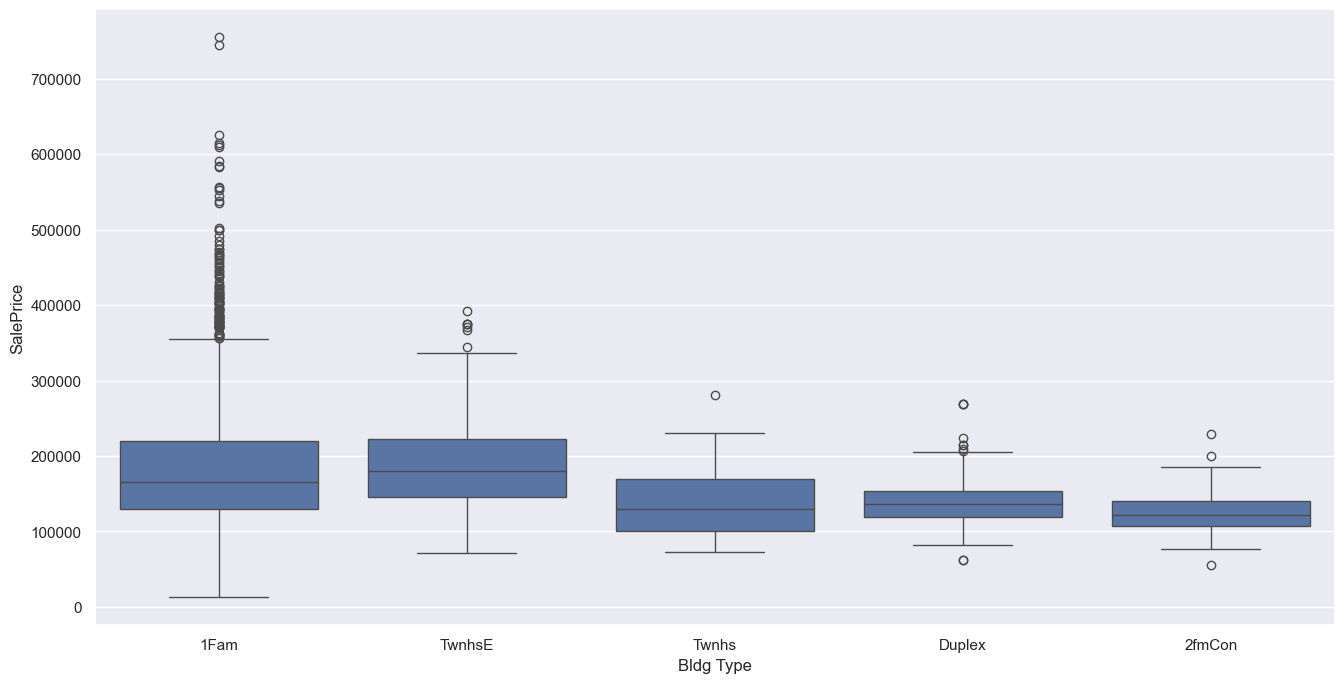

In [64]:
sns.boxplot(x='Bldg Type', y='SalePrice', data=df)
plt.show()

!Fam  and TwnsE building Type is appreciated by many tend to have high market value.

C:\Users\ABDURRAHMAN IDRIS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


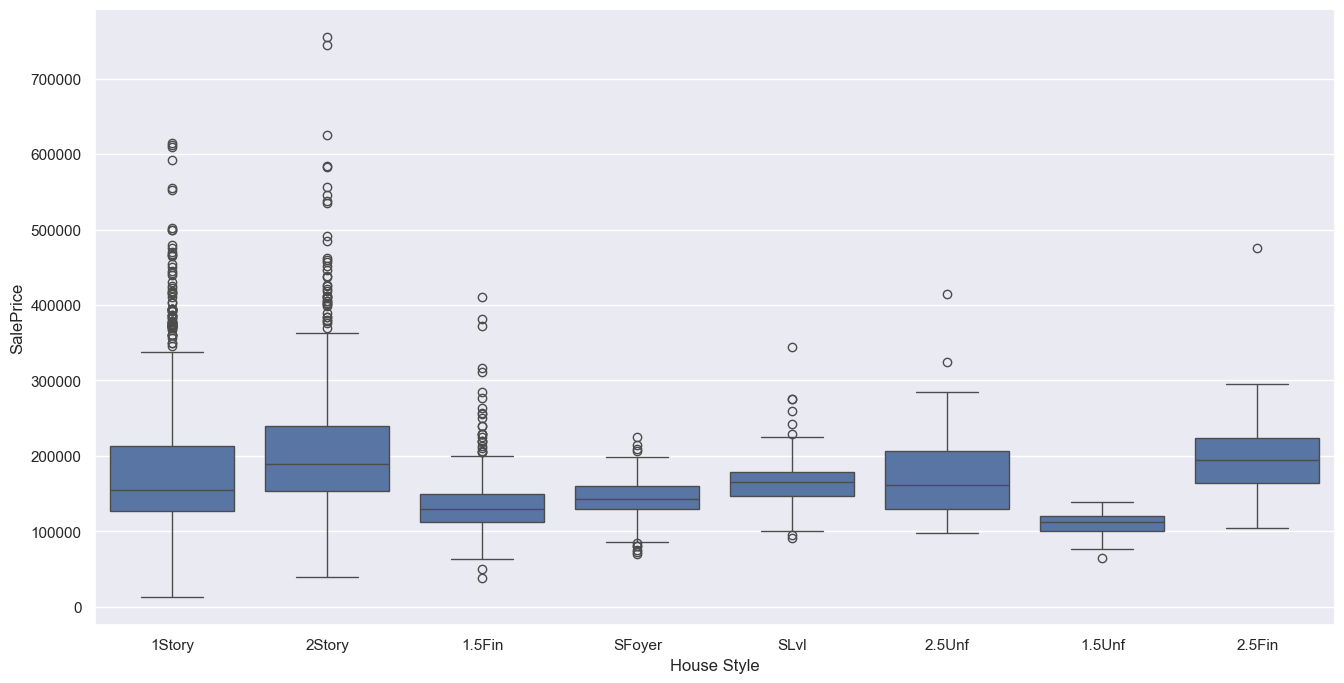

C:\Users\ABDURRAHMAN IDRIS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


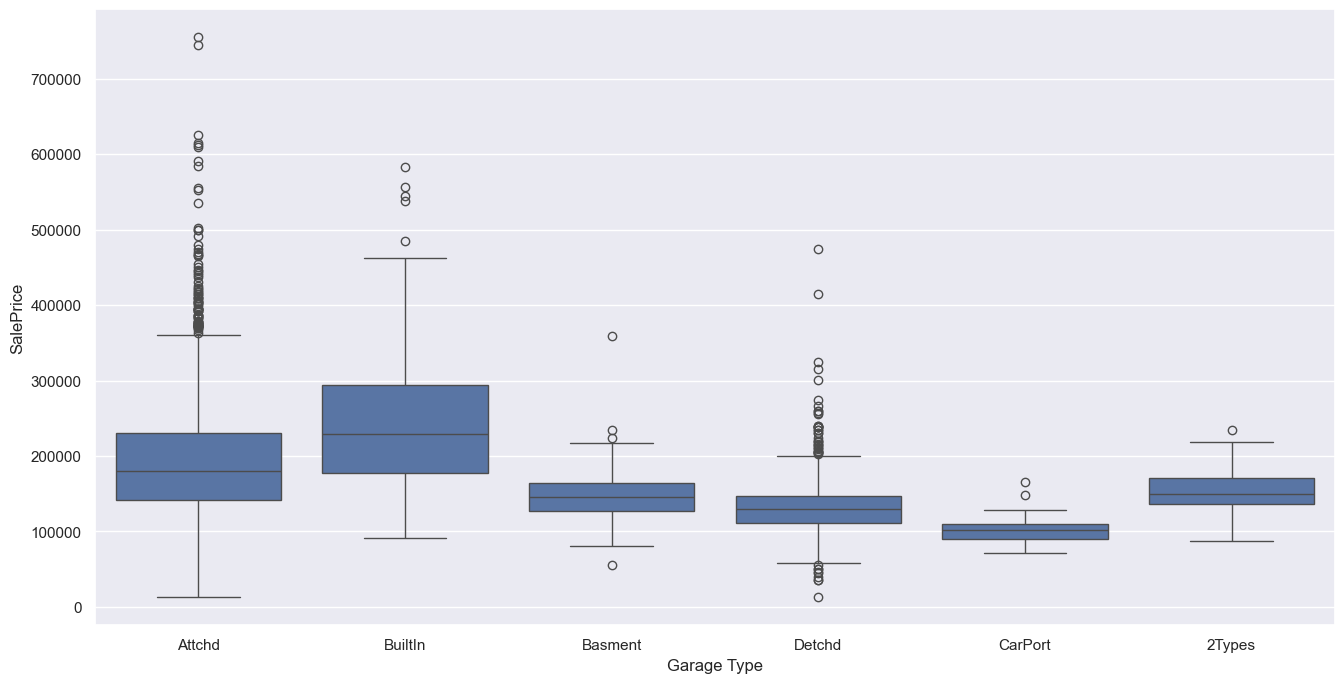

In [65]:
sns.boxplot(x='House Style', y='SalePrice', data=df)
plt.show()

sns.boxplot(x='Garage Type', y='SalePrice', data=df)
plt.show()


for Housing Style, 2Story, 1Story and 2.5Unit accomodate more people with good market price, but doesnt influence salePrice while Builtin Garage type is prefered tend to cost more in the market SalePrice but that doesn't prove trend in the housing salesPrice increase.

In [66]:
# saving the cleaned dataset
file_path = 'data/cleaned_data.csv'
df.to_csv(file_path)